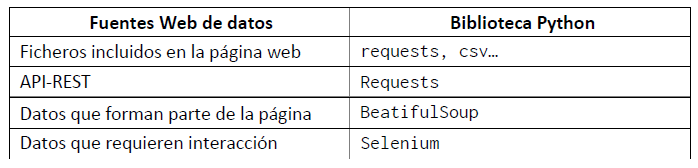

URLs

#### schema:[//[user[:passwd]@]host[:port]][/path][?query][#tag]



En esta URL, el esquema viene dado por el protocolo https, la autoridad
corresponde con es.wikipedia.org (no hay usuario ni palabra clave) y la ruta es la
cadena wiki/Alan_Turing. La URI no contiene consultas, pero sí una etiqueta final,
tras el símbolo “#”: Turing_en_el_cine.

In [3]:
import os
import requests

# Definir la URL y el directorio de destino
url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
directory = r'C:\Users\CursosTardes\Desktop\Olga GG\Modulo_5_P\PythonGH\IT-Automation-with-Python\Test'
file_path = os.path.join(directory, 'horario.txt')

# Asegurarse de que el directorio existe
os.makedirs(directory, exist_ok=True)

try:
    # Descargar el archivo
    resp = requests.get(url)
    if resp.status_code == 200:
        with open(file_path, 'wb') as output:
            output.write(resp.content)
        print(f"Archivo guardado en: {file_path}")
    else:
        print(f"Error al descargar el archivo: {resp.status_code}")
except Exception as e:
    print(f"Ocurrió un error: {e}")


Error al descargar el archivo: 503


#### Analizar datos descargados con csv y matplotlib:

In [ ]:
import csv
import matplotlib.pyplot as plt

path = r'C:\Users\CursosTardes\Desktop\Olga GG\Modulo_5_P\PythonGH\IT-Automation-with-Python\Test'
with open(path + r'\horario.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        # Verificar que la fila tenga al menos 57 columnas
        if len(row) < 57:
            print(f"Fila con longitud inesperada: {row}")
            continue
        
        if (row[0]+row[1]+row[2]=='28079004' and row[3]=='12'):
            plt.title("Óxido de nitrógeno: " + row[8] + "/" + row[7] + "/" + row[6])
            hora = 0
            desp = 9
            vs = []
            horas = []
            while hora <= 23:
                if row[desp + 2*hora + 1] == 'V':
                    vs.append(row[desp + 2*hora])
                    horas.append(hora)
                hora += 1
            plt.plot(horas, vs)
            plt.show()


#### Web scraping estático con BeautifulSoup:

In [9]:
from bs4 import BeautifulSoup

# Ruta del archivo
url = r'C:\Users\CursosTardes\Desktop\Olga GG\Modulo_5_P\PythonGH\IT-Automation-with-Python\Test\mini.html'

# Crear un archivo HTML de ejemplo si no existe
html_content = '''
<!DOCTYPE html>
<html>
  <head>
    <title>
      Un mini ejemplo
    </title>
  </head>
  <body>
    <div id="date"> Fecha 13/06/2024 </div>
    <div id="content"> Un poco de texto </div>
  </body>
</html>
'''

# Escribir el contenido HTML en el archivo
with open(url, "w") as f:
    f.write(html_content)

# Leer el archivo HTML y procesarlo con BeautifulSoup
with open(url, "r") as f:
    page = f.read()

soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())
print(soup.find("div", id="date").get_text())


<!DOCTYPE html>
<html>
 <head>
  <title>
   Un mini ejemplo
  </title>
 </head>
 <body>
  <div id="date">
   Fecha 13/06/2024
  </div>
  <div id="content">
   Un poco de texto
  </div>
 </body>
</html>

 Fecha 13/06/2024 


#### Web scraping dinámico con Selenium:

In [12]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

# Ruta al chromedriver, asegúrate de actualizar la ruta correcta si es necesario
chromedriver_path = r'C:\path\to\chromedriver.exe'
service = Service(executable_path=chromedriver_path)

driver = webdriver.Chrome(service=service)
url = "https://www1.sedecatastro.gob.es/CYCBienInmueble/OVCBusqueda.aspx"
driver.get(url)

coord = driver.find_element_by_link_text("COORDENADAS")
coord.click()

lat = driver.find_element_by_id("ctl00_Contenido_txtLatitud")
lon = driver.find_element_by_id("ctl00_Contenido_txtLongitud")

latitud = "28.2723368"
longitud = "-16.6600606"
lat.send_keys(latitud)
lon.send_keys(longitud)

datos = driver.find_element_by_id("ctl00_Contenido_btnDatos")
datos.click()

# Añadir cualquier paso adicional para extraer datos según sea necesario
# driver.quit() para cerrar el navegador al finalizar


NoSuchDriverException: Message: Unable to obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location
